## Observations and Insights

## Dependencies and starter code

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_study_results = mouse_metadata.merge(study_results, on="Mouse ID")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


## Summary statistics

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby_regimen = mouse_study_results.groupby('Drug Regimen')

tumor_stats_by_drug = pd.DataFrame()
tumor_stats_by_drug["Mean Tumor Size"] = groupby_regimen.mean()['Tumor Volume (mm3)']
tumor_stats_by_drug["Median Tumor Size"] = groupby_regimen.median()['Tumor Volume (mm3)']
tumor_stats_by_drug["Tumor Size Variance"] = groupby_regimen.var()['Tumor Volume (mm3)']
tumor_stats_by_drug["Tumor Size Standard Deviation"] = groupby_regimen.std()['Tumor Volume (mm3)']

#I don't actually know how to run the sem function on a grouped data set, so I broke the set into 
# subsets for each drug and took stats then. 

per_drug_tumor_sems = {}
#For each drug
for drug in mouse_study_results["Drug Regimen"].unique():
    #Filter for only the subset where Drug Regimen == this drug
    specific_drug_results = mouse_study_results.loc[mouse_study_results["Drug Regimen"] == drug]
    #Run SEM function on filtered data 
    specific_drug_tumor_sem = st.sem(specific_drug_results["Tumor Volume (mm3)"])
    #Write SEM for this drug to dict
    per_drug_tumor_sems[drug] = specific_drug_tumor_sem

#put the dict into the series to match the tumor stats by index    
per_drug_tumor_sems = pd.Series(per_drug_tumor_sems)   
#Add series as a new column on our dataframe
tumor_stats_by_drug["Tumor Size SEM"] = per_drug_tumor_sems    
tumor_stats_by_drug 

,Mean Tumor Size,Median Tumor Size,Tumor Size Variance,Tumor Size Standard Deviation,Tumor Size SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

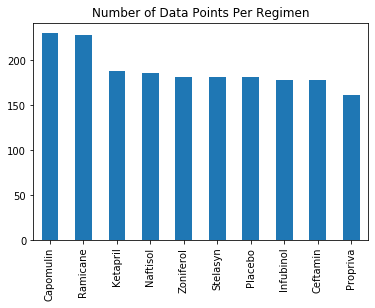

In [79]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mouse_study_results["Drug Regimen"].value_counts().plot(y="n", title="Number of Data Points Per Regimen", kind="bar")


Text(0.5, 1.0, 'Number of Data Points per Drug Regimen')

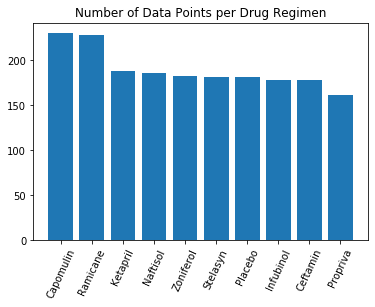

In [78]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(mouse_study_results["Drug Regimen"].value_counts().index, mouse_study_results["Drug Regimen"].value_counts())
plt.xticks( rotation=65 )
plt.title("Number of Data Points per Drug Regimen")

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen